# Hasbi Thaufik Oktodila

# About This Notebook

Conducted in 28 Oct 2022.

This is an attempt to explore text analysis. This project may be continued to Deep Learning and develop a model to detect cyber-violence from news headline.

# Data Loading

Importing Libraries

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
#pd.set_option('display.max_colwidth', None)

Loading the .csv file

In [10]:
df = pd.read_csv('cyber-operations-incidents.csv')
print(df.head(1).Sources_1)

0    https://www.theregister.co.uk/2020/02/14/austr...
Name: Sources_1, dtype: object


Exploring data's basic info

In [11]:
df.shape

(481, 12)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 473
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          474 non-null    datetime64[ns]
 1   Affiliations  341 non-null    object        
 2   Victims       446 non-null    object        
 3   Sponsor       434 non-null    object        
 4   Type          443 non-null    object        
 5   Category      452 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 25.9+ KB


# Data Cleaning

## Dropping unused column

In [17]:
# dropping unused column

df = df.drop(['Title', 'Description', 'Response', 'Sources_1', 'Sources_2', 'Sources_3'], axis = 1)
df

,Date,Affiliations,Victims,Sponsor,Type,Category
0,2/13/2020,Turla,Austrian Foreign Ministry,Russian Federation,Espionage,Government
1,1/23/2020,Konni Group,Employees of the U.S. government,Korea (Democratic People's Republic of),Espionage,Government
2,4/6/2020,NaN,NaN,Australia,Data destruction,Private sector
3,2/16/2020,APT-C-23,Israeli Defense Forces (IDF) soldiers,"Palestine, State of",Espionage,Military
4,8/10/2020,Fox Kitten,"U.S. government agencies, U.S. companies",Iran (Islamic Republic of),Espionage,"Government, Private sector"
...,...,...,...,...,...,...
476,NaN,Believed to be the work of MuddyWater.,"Russian Federation, Pakistan, Saudi Arabia, Tu...",Iran (Islamic Republic of),Espionage,"Government, Private sector"
477,NaN,Also known as Thallium and Smoke Screen,"France, Slovakia, Stanford University, U.S. Th...",NaN,NaN,"Government, Private sector"
478,NaN,NaN,"Egypt, Israel, Saudi Arabia, United Arab Emira...",Iran (Islamic Republic of),NaN,"Private sector, Government"
479,NaN,Believed to be responsible for the targeting o...,"United States, United Kingdom",Russian Federation,Espionage,Private sector


## Converting date's data type from 'object' to 'datetime'

In [18]:
df['Date'] = pd.to_datetime(df['Date'])

## Removing null value on the date's column

In [24]:
df = df.dropna(axis=0, subset=['Date'])

## Filling Null values in Affiliations to 'Uncategorized'

dalam mengisi null value di sisa kolom lain, ada beberapa hal yang dipertimbangkan
- dalam kolom Affiliations, kolom ini akan diisi 'Uncategorized', karena masih ada informasi yang bisa diolah di baris-baris lainnya.
- dalam kolom Victims, null akan diisi 'Uncategorized', karena null value disini akan dianggap tidak dapat dikategorisasikan.
- Dalam kolom Sponsor, null value akan diisi 'Unknown'. Null value disini dianggap bahwa serangan cyber tersebut tidak diketahui sumbernya.
- dalam kolom Type, kolom ini akan diisi 'Uncategorized', karena masih ada informasi yang bisa diolah di baris-baris lainnya.
- Dalam kolom Category, kolom ini akan diisi 'Uncategorized', karena null value disini akan dianggap tidak dapat dikategorisasikan.

In [32]:
# Mengisi Affiliations dengan 'Uncategorized'
df['Affiliations'].fillna(value='Uncategorized', inplace=True)

# Mengisi Affiliations dengan 'Uncategorized'
df['Victims'].fillna(value='Uncategorized', inplace=True)

# Mengisi Sponsor dengan 'Unknown'
df['Sponsor'].fillna(value='Unknown', inplace=True)

# Mengisi Type dengan 'Uncategorized'
df['Type'].fillna(value='Uncategorized', inplace=True)

# Mengisi Category dengan 'Uncategorized'
df['Category'].fillna(value='Uncategorized', inplace=True)

In [36]:
df.head(1)

,Date,Affiliations,Victims,Sponsor,Type,Category
0,2020-02-13,Turla,Austrian Foreign Ministry,Russian Federation,Espionage,Government


# Data Exploration

In [74]:
dftype = df['Type'].value_counts().index
dftype

Index(['Espionage', 'Uncategorized', 'Sabotage', 'Denial of service',
       'Data destruction', 'Financial Theft', 'Doxing', 'Defacement'],
      dtype='object')

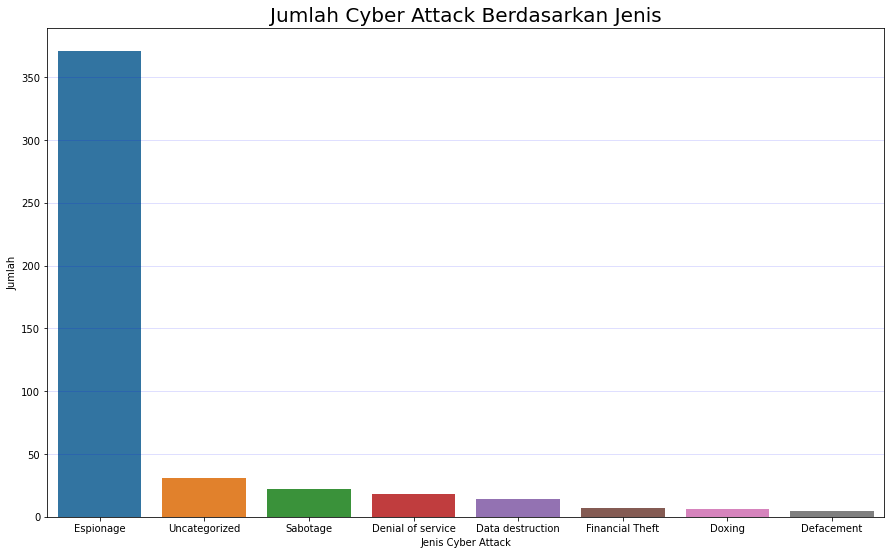

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.countplot(data=df, x='Type', order=dftype)
ax.grid(axis='y', linewidth=0.5, alpha=0.25, color='blue')
ax.set(xlabel='Jenis Cyber Attack')
ax.set(ylabel='Jumlah')

plt.title('Jumlah Cyber Attack Berdasarkan Jenis', fontsize = 20, c='black')
plt.show()

In [64]:
df1 = df.groupby(['Victims'])['Date'].count().sort_values(ascending=False).to_frame().reset_index().head(15)
df1.rename(columns={"Date": "Total"})
df1['Victims']=='Banks of America, Citigroup, WellsFargor, US Bancorp, PNC, Capital One, Fifth Third Bank, BB&T, HSBC'
df1.loc[df1['Victims'].str.contains('HSBC'), 'Victims'] = 'Groups of Banks'
df1

,Victims,Date
0,Uncategorized,28
1,United States,21
2,South Korea,7
3,Ukraine,7
4,Germany,6
5,NASA,4
6,Russia,4
7,Australia,3
8,India,3
9,U.S. Department of State,3


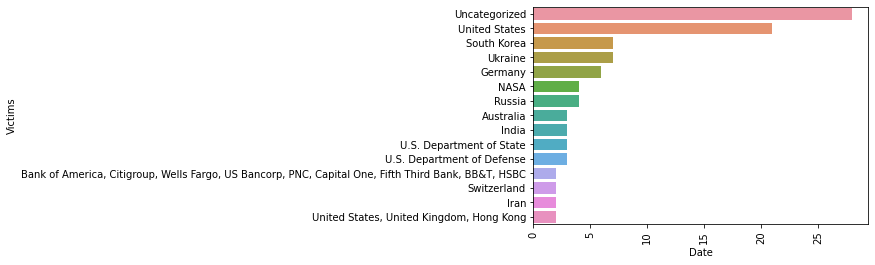

<Figure size 1080x576 with 0 Axes>

In [60]:
ax = sns.barplot(x = 'Date', y='Victims', data=df1.sort_values(by='Date', ascending=False))
plt.xticks(rotation=90)
plt.figure(figsize=(15,8))
plt.tight_layout
plt.show()

In [35]:
# memastikan datatype dan nullvalue
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 473
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          474 non-null    datetime64[ns]
 1   Affiliations  474 non-null    object        
 2   Victims       474 non-null    object        
 3   Sponsor       474 non-null    object        
 4   Type          474 non-null    object        
 5   Category      474 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 25.9+ KB


In [27]:
df.head(3)

,Date,Affiliations,Victims,Sponsor,Type,Category
0,2020-02-13,Turla,Austrian Foreign Ministry,Russian Federation,Espionage,Government
1,2020-01-23,Konni Group,Employees of the U.S. government,Korea (Democratic People's Republic of),Espionage,Government
2,2020-04-06,NaN,NaN,Australia,Data destruction,Private sector


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         481 non-null    object
 1   Date          474 non-null    object
 2   Affiliations  347 non-null    object
 3   Description   481 non-null    object
 4   Response      86 non-null     object
 5   Victims       453 non-null    object
 6   Sponsor       439 non-null    object
 7   Type          447 non-null    object
 8   Category      458 non-null    object
 9   Sources_1     475 non-null    object
 10  Sources_2     355 non-null    object
 11  Sources_3     168 non-null    object
dtypes: object(12)
memory usage: 45.2+ KB


In [13]:
df['Victims'].unique()

array(['Austrian Foreign Ministry', 'Employees of the U.S. government',
       nan, 'Israeli Defense Forces (IDF) soldiers',
       'U.S. government agencies, U.S. companies',
       'Saudi Arabian citizens in the Untied States',
       'Global financial institutions',
       'Iranian expats and dissidents, North American and Israeli organizations',
       'Burisma', 'Ben Hubbard', 'Israel',
       'Arabic speakers in Syria and surrounding region',
       'Defense companies', 'Private companies in numerous countries',
       'Poland’s War Studies University', 'Iranian expats and dissidents',
       'Bapco',
       'Vatican City, Pontifical Institute for Foreign Missions, Hong Kong Study Mission to China',
       'Japanese, Russian, and South Korean civil society, private sector, and government entities.',
       'Infrastructure used by foreign-based cybercriminals',
       'Taiwanese government agencies and email accounts',
       'The U.S. electrical grid', 'European aerospace and def

In [14]:
df.head(1)

,Title,Date,Affiliations,Description,Response,Victims,Sponsor,Type,Category,Sources_1,Sources_2,Sources_3
0,Attack on Austrian foreign ministry,2/13/2020,Turla,The suspected Russian hackers conducted a week...,Confirmation https://www.theregister.co.uk/2...,Austrian Foreign Ministry,Russian Federation,Espionage,Government,https://www.theregister.co.uk/2020/02/14/austr...,https://www.bmeia.gv.at/en/the-ministry/press/...,NaN


In [ ]:
df.Victims.value_counts().to_frame().head(10)

,Victims
United States,21
South Korea,7
Ukraine,7
Germany,6
NASA,4
Russia,4
U.S. Department of Defense,3
Australia,3
U.S. Department of State,3
India,3


In [ ]:
df.Category.value_counts().to_frame().head(10)

,Category
Private sector,128
Government,104
"Government, Private sector",55
Civil society,52
Military,21
"Government, Military",17
"Government, Civil society",15
"Private sector, Government",14
"Government, Private sector, Civil society",12
"Military, Government",8


In [ ]:
df.Type.value_counts().to_frame().head(10)

,Type
Espionage,374
Sabotage,23
Denial of service,18
Data destruction,14
Financial Theft,7
Doxing,6
Defacement,5


In [ ]:
df_esp_gov = df[(df['Type'] == 'Espionage') & (df['Category'] == 'Government')]
df_esp_gov.info

<bound method DataFrame.info of                                                  Title        Date  \
0                  Attack on Austrian foreign ministry   2/13/2020   
1    Spear-phishing campaign against unnamed U.S. g...   1/23/2020   
21                                           BlackTech   8/19/2020   
24        Targeting of U.S. government agency networks  11/14/2020   
30   Targeting of Taiwanese government agencies and...   8/19/2020   
..                                                 ...         ...   
457            Compromise at NASA Kennedy Space Center  11/19/2008   
458       Compromise of NASA network in Washington, DC  11/19/2008   
467           Compromise of German government networks   8/27/2007   
469  Attempted compromise of Australian and New Zea...   9/12/2007   
470                 Compromise at the State Department   7/11/2006   

                                          Affiliations  \
0                                                Turla   
1          

In [ ]:
df_esp_gov.shape

(89, 12)

In [ ]:
df_esp_gov2 = df[(df['Type'] == 'Espionage') & (df['Victims'] == 'United States')]
df_esp_gov2.count()

Title           20
Date            20
Affiliations    14
Description     20
Response         3
Victims         20
Sponsor         16
Type            20
Category        19
Sources_1       20
Sources_2       13
Sources_3        5
dtype: int64